In [1]:
import pandas as pd
import glob
import os

# 1. 시트별 경로 정의
table_paths = {
    "1.회원정보": "data/train/1.회원정보",
    "8.성과정보": "data/train/8.성과정보"
}

# 2. 데이터 불러오기
merged_data = {}

for name, path in table_paths.items():
    files = glob.glob(os.path.join(path, "*.parquet"))
    if len(files) > 0:
        df = pd.concat([pd.read_parquet(f) for f in sorted(files)], ignore_index=True)
        merged_data[name] = df
        print(f"{name} ✅ 불러오기 완료: {df.shape}")
    else:
        print(f"{name} ⚠️ 파일 없음")

# 3. 필요한 데이터 추출 및 병합
member_df = merged_data["1.회원정보"]
result_df = merged_data["8.성과정보"]

# ID, Segment만 추출
segment_df = member_df[['ID', 'Segment']].drop_duplicates(subset='ID')

# ID 기준 병합
result_df_with_segment = pd.merge(result_df, segment_df, on='ID', how='left')

# 4. 병합 결과 확인
print(f"병합 후 행 수: {len(result_df_with_segment)}")
print(f"Segment 컬럼 결측치 수: {result_df_with_segment['Segment'].isnull().sum()}")

# 5. CSV 파일로 저장
save_path = "data/성과정보_with_segment.csv"
result_df_with_segment.to_csv(save_path, index=False, encoding='utf-8-sig')
print(f"📁 CSV 저장 완료: {save_path}")

1.회원정보 ✅ 불러오기 완료: (2400000, 78)
8.성과정보 ✅ 불러오기 완료: (2400000, 49)
병합 후 행 수: 2400000
Segment 컬럼 결측치 수: 0
📁 CSV 저장 완료: data/성과정보_with_segment.csv


In [2]:
result_df_with_segment = pd.read_csv("data/성과정보_with_segment.csv")
result_df_with_segment

,기준년월,ID,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_신용_전월,...,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment
0,201807,TRAIN_000000,0.454548,0.454548,0.364727,1.999996,0.0,0.000000,0.0,0.409766,...,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543,D
1,201807,TRAIN_000001,-0.511808,-0.511808,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,...,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000,E
2,201807,TRAIN_000002,-0.062716,-0.062716,0.067843,-1.999996,0.0,0.000000,0.0,-0.902166,...,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420,C
3,201807,TRAIN_000003,0.135707,0.135707,0.153975,-1.999996,0.0,0.000000,0.0,-0.866052,...,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124,D
4,201807,TRAIN_000004,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000028,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
2399996,201812,TRAIN_399996,0.073804,0.073804,0.073804,0.000000,0.0,0.000000,0.0,0.207099,...,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815,D
2399997,201812,TRAIN_399997,-0.040432,-0.040432,-0.040432,0.000000,0.0,0.000000,0.0,0.254495,...,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000,C
2399998,201812,TRAIN_399998,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000034,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E


In [3]:
result_df_with_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 50 columns):
 #   Column              Dtype  
---  ------              -----  
 0   기준년월                int64  
 1   ID                  object 
 2   증감율_이용건수_신용_전월      float64
 3   증감율_이용건수_신판_전월      float64
 4   증감율_이용건수_일시불_전월     float64
 5   증감율_이용건수_할부_전월      float64
 6   증감율_이용건수_CA_전월      float64
 7   증감율_이용건수_체크_전월      float64
 8   증감율_이용건수_카드론_전월     float64
 9   증감율_이용금액_신용_전월      float64
 10  증감율_이용금액_신판_전월      float64
 11  증감율_이용금액_일시불_전월     float64
 12  증감율_이용금액_할부_전월      float64
 13  증감율_이용금액_CA_전월      float64
 14  증감율_이용금액_체크_전월      float64
 15  증감율_이용금액_카드론_전월     float64
 16  증감율_이용건수_신용_분기      float64
 17  증감율_이용건수_신판_분기      float64
 18  증감율_이용건수_일시불_분기     float64
 19  증감율_이용건수_할부_분기      float64
 20  증감율_이용건수_CA_분기      float64
 21  증감율_이용건수_체크_분기      float64
 22  증감율_이용건수_카드론_분기     float64
 23  증감율_이용금액_신용_분기      float64
 24  증감율_이용금액_신판_분기      floa

In [4]:
result_df_with_segment.isna().sum()

기준년월                       0
ID                         0
증감율_이용건수_신용_전월             0
증감율_이용건수_신판_전월             0
증감율_이용건수_일시불_전월            0
증감율_이용건수_할부_전월             0
증감율_이용건수_CA_전월             0
증감율_이용건수_체크_전월             0
증감율_이용건수_카드론_전월            0
증감율_이용금액_신용_전월             0
증감율_이용금액_신판_전월             0
증감율_이용금액_일시불_전월            0
증감율_이용금액_할부_전월             0
증감율_이용금액_CA_전월             0
증감율_이용금액_체크_전월             0
증감율_이용금액_카드론_전월            0
증감율_이용건수_신용_분기             0
증감율_이용건수_신판_분기             0
증감율_이용건수_일시불_분기            0
증감율_이용건수_할부_분기             0
증감율_이용건수_CA_분기             0
증감율_이용건수_체크_분기             0
증감율_이용건수_카드론_분기            0
증감율_이용금액_신용_분기             0
증감율_이용금액_신판_분기             0
증감율_이용금액_일시불_분기            0
증감율_이용금액_할부_분기             0
증감율_이용금액_CA_분기             0
증감율_이용금액_체크_분기             0
증감율_이용금액_카드론_분기            0
잔액_신판평균한도소진율_r6m           0
잔액_신판최대한도소진율_r6m           0
잔액_신판평균한도소진율_r3m           0
잔액_신판최대한도소진율_r3m           0
잔액_신판ca평균한도소진율

In [5]:
# 결측치 시각화를 위한 라이브러리
import missingno

# 그래프 기본 import
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

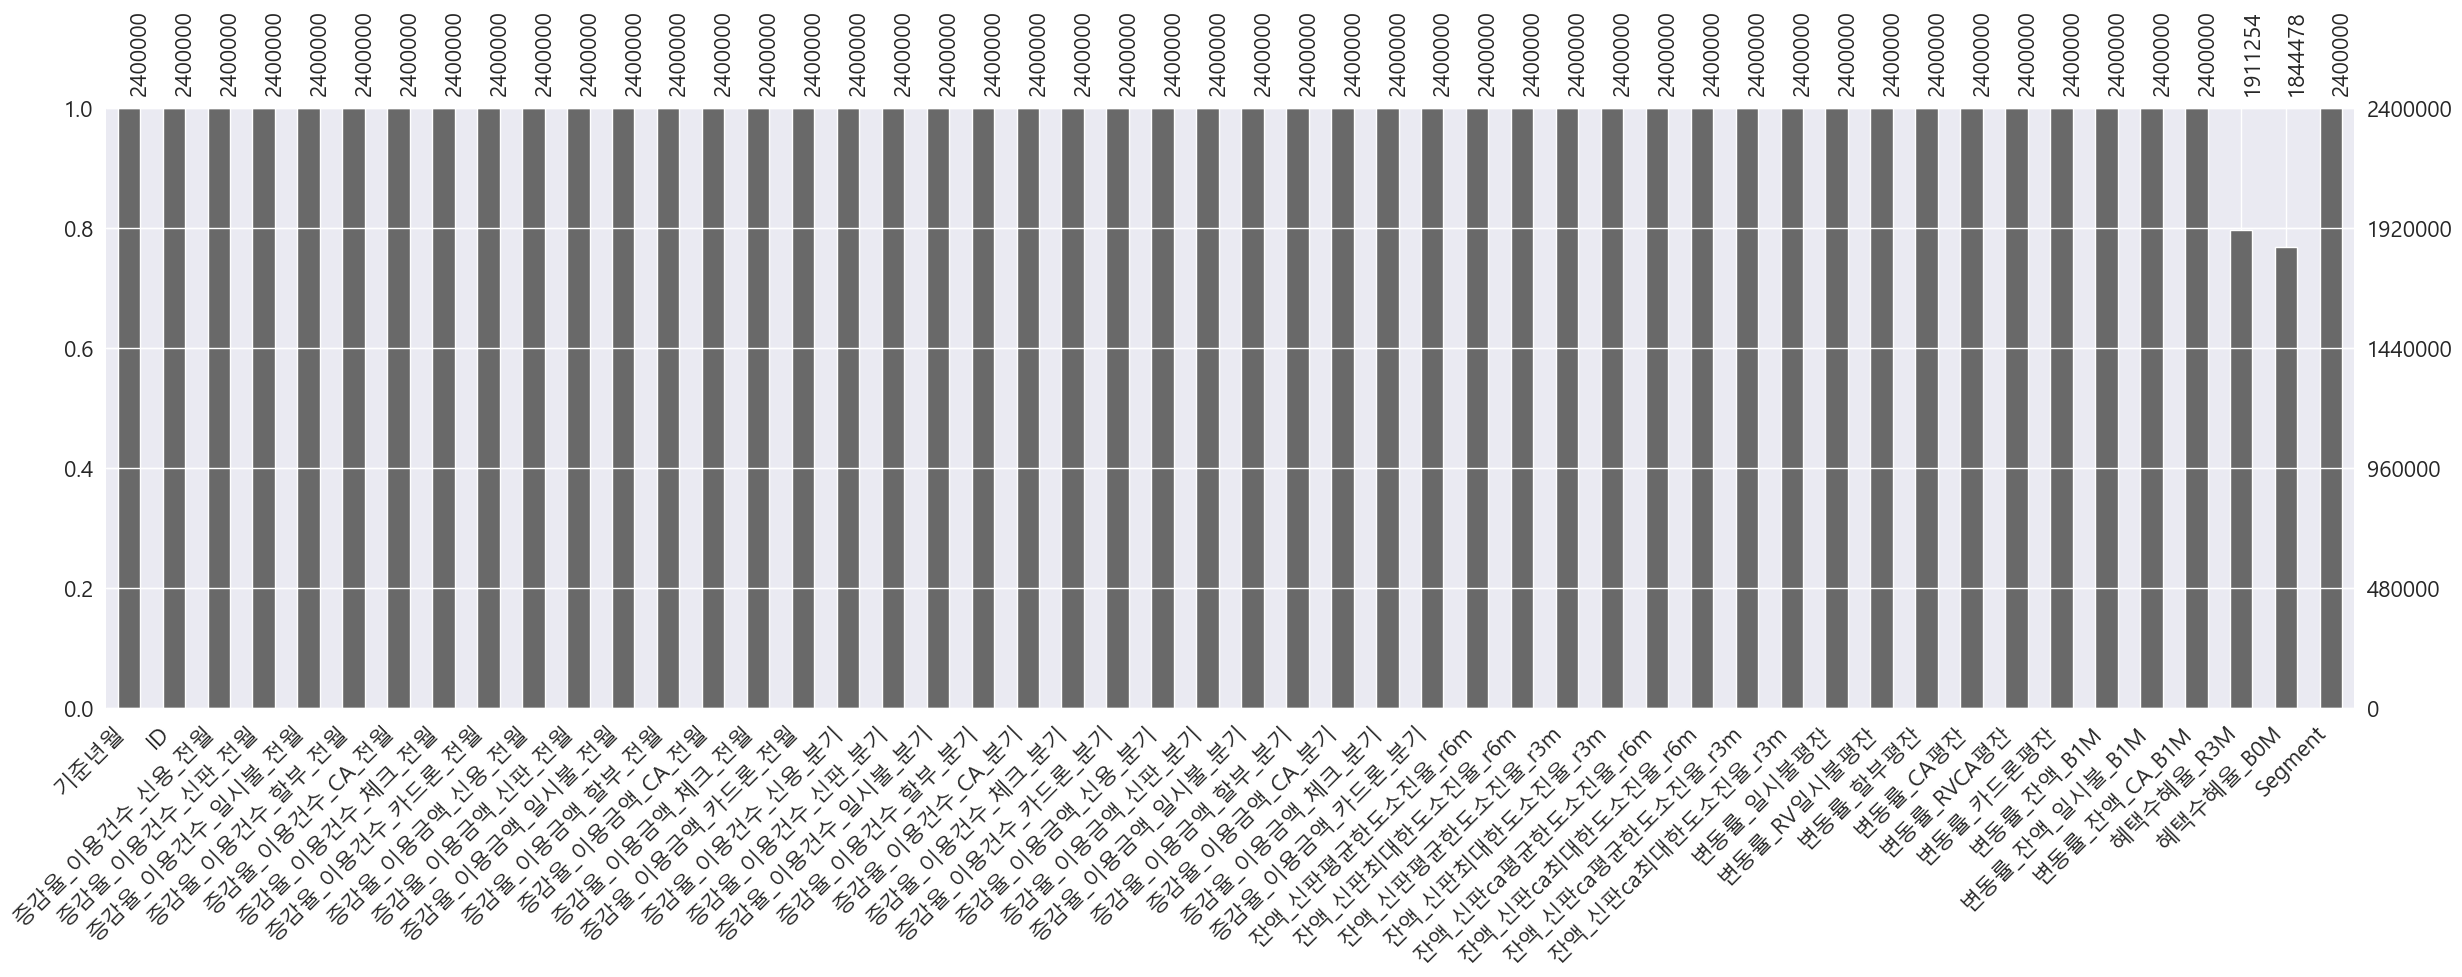

In [6]:
# 신용 정보 내부에 결측치 현황을 그려 분석한다.
missingno.bar(result_df_with_segment)
plt.xticks(rotation=90)  # x축 라벨 세로로 세우기
plt.tight_layout()
plt.show()

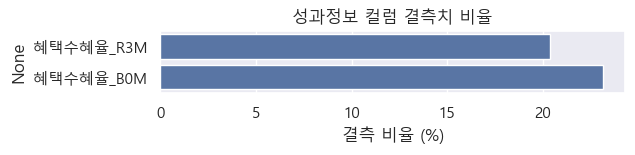

In [7]:
# 결측치 비율 계산
missing_ratio = result_df_with_segment.isnull().mean() * 100
missing_ratio = missing_ratio[missing_ratio > 0]  # 결측치가 있는 컬럼만

# 세로 막대그래프
plt.figure(figsize=(6, len(missing_ratio) * 0.4))  # 컬럼 수에 따라 높이 조절
sns.barplot(x=missing_ratio.values, y=missing_ratio.index, orient='h')
plt.xlabel("결측 비율 (%)")
plt.title("성과정보 컬럼 결측치 비율")
plt.tight_layout()
plt.show()

## 증감율
- 증감율_이용건수

In [9]:
# '증감율_이용건수'로 시작하는 컬럼만 추출
usage_growth_cols = [col for col in result_df_with_segment.columns if col.startswith("증감율_이용건수")]

# 결과 확인
print("📌 결제 및 연체 관련 컬럼:")
for col in usage_growth_cols:
    print(col)

📌 결제 및 연체 관련 컬럼:
증감율_이용건수_신용_전월
증감율_이용건수_신판_전월
증감율_이용건수_일시불_전월
증감율_이용건수_할부_전월
증감율_이용건수_CA_전월
증감율_이용건수_체크_전월
증감율_이용건수_카드론_전월
증감율_이용건수_신용_분기
증감율_이용건수_신판_분기
증감율_이용건수_일시불_분기
증감율_이용건수_할부_분기
증감율_이용건수_CA_분기
증감율_이용건수_체크_분기
증감율_이용건수_카드론_분기


In [10]:
def show_value_counts_for_usage_growth(df):
    # '증감율_이용건수'로 시작하는 컬럼만 선택
    usage_cols = [col for col in df.columns if col.startswith("증감율_이용건수")]

    # 각 컬럼에 대해 도수분포 출력
    for col in usage_cols:
        print(f"\n📊 [ {col} ] 도수분포:")
        print(df[col].value_counts(dropna=False).sort_index())

In [11]:
show_value_counts_for_usage_growth(result_df_with_segment)


📊 [ 증감율_이용건수_신용_전월 ] 도수분포:
증감율_이용건수_신용_전월
-1.999996    31020
-1.999996        1
-1.999996        1
-1.999995        1
-1.999995        1
             ...  
 1.999941        1
 1.999964        1
 1.999989        1
 1.999991        1
 1.999996    19311
Name: count, Length: 1497553, dtype: int64

📊 [ 증감율_이용건수_신판_전월 ] 도수분포:
증감율_이용건수_신판_전월
-1.999996    30831
-1.036495        1
-1.016771        1
-0.983518        1
-0.972667        1
             ...  
 1.390684        1
 1.392350        1
 1.434809        1
 1.515006        1
 1.999996    19368
Name: count, Length: 1496398, dtype: int64

📊 [ 증감율_이용건수_일시불_전월 ] 도수분포:
증감율_이용건수_일시불_전월
-1.999996    27780
-1.016771        1
-0.989092        1
-0.972667        1
-0.965269        1
             ...  
 1.364252        1
 1.369148        1
 1.386857        1
 1.475546        1
 1.999996    18865
Name: count, Length: 1494269, dtype: int64

📊 [ 증감율_이용건수_할부_전월 ] 도수분포:
증감율_이용건수_할부_전월
-1.999996    122341
-0.666322         1
-0.656407         1
-0.646698 

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_usage_growth_histograms(df):
    usage_cols = [col for col in df.columns if col.startswith("증감율_이용건수")]
    
    for col in usage_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col].dropna(), bins=30, kde=True)
        plt.title(f"📊 {col} 히스토그램")
        plt.xlabel("값")
        plt.ylabel("빈도수")
        plt.grid(True)
        plt.tight_layout()
        plt.show()

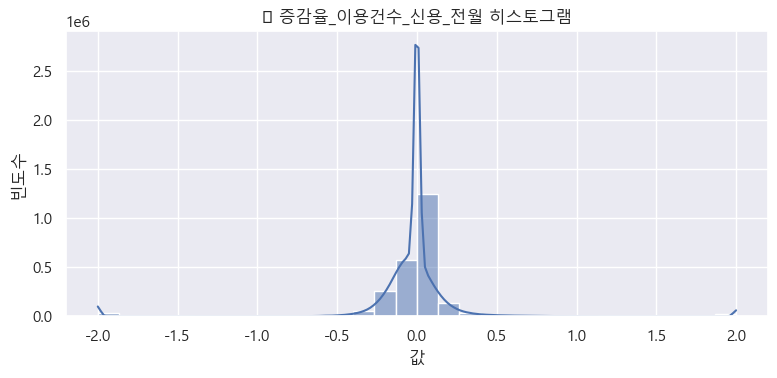

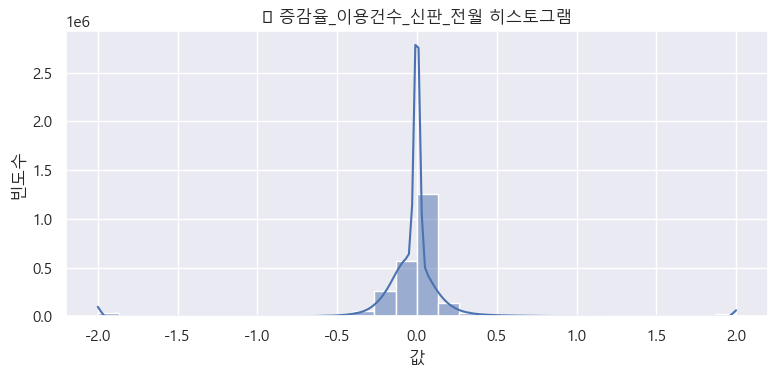

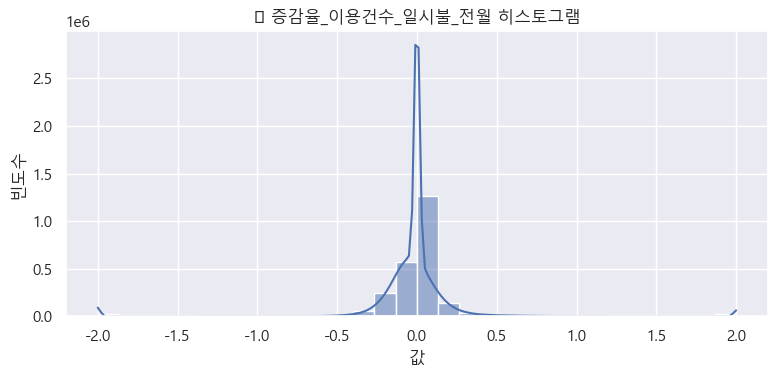

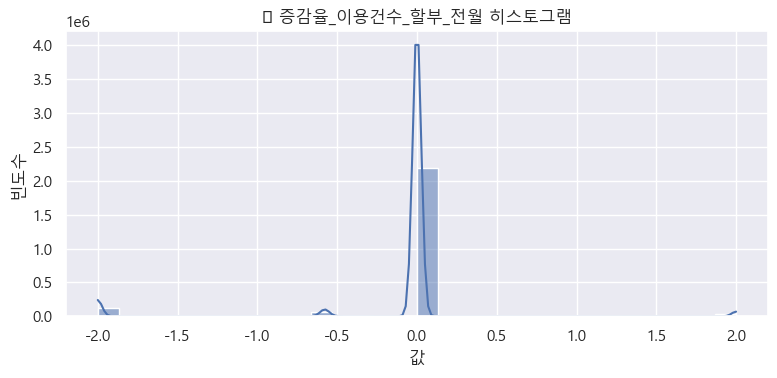

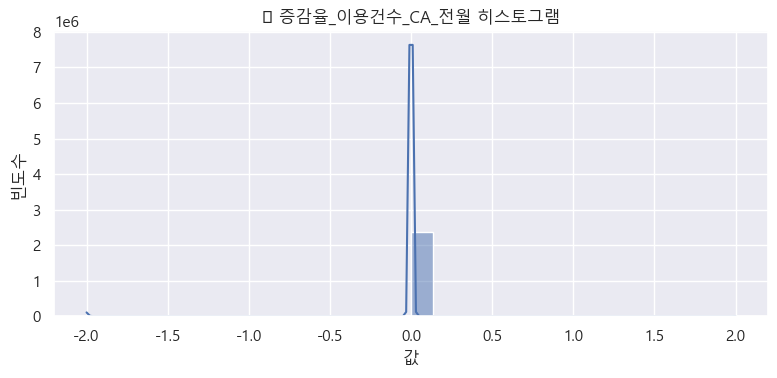

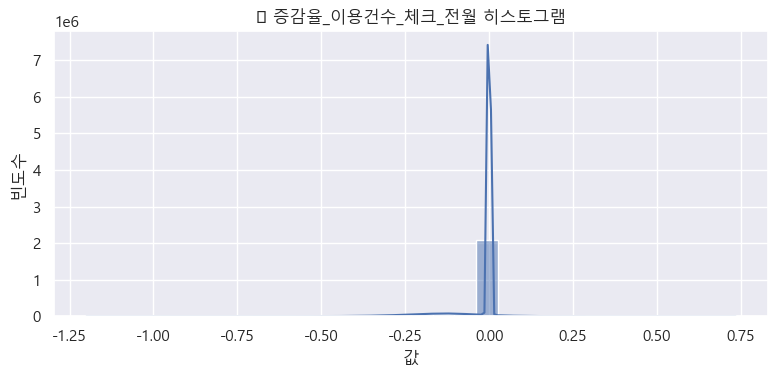

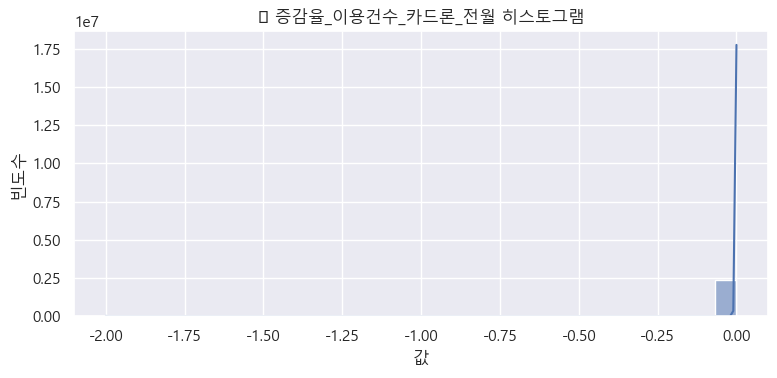

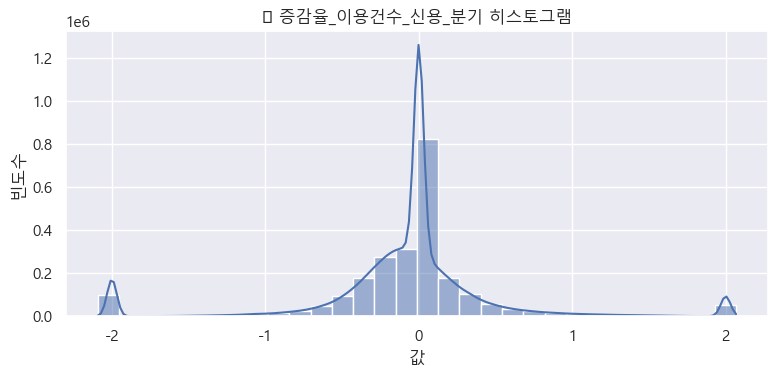

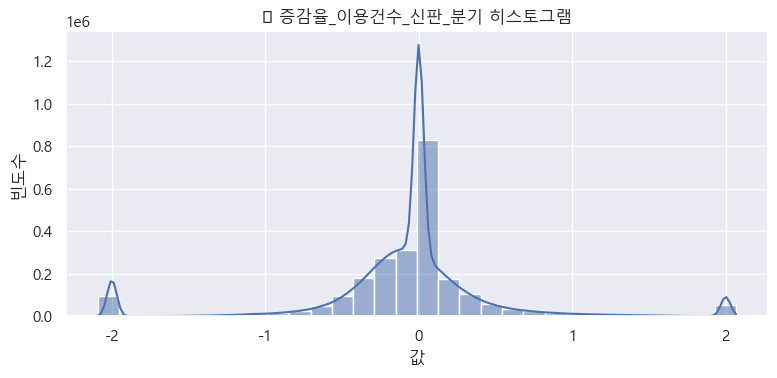

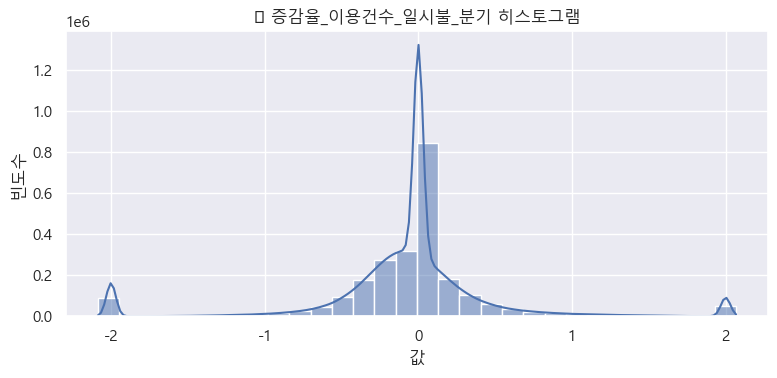

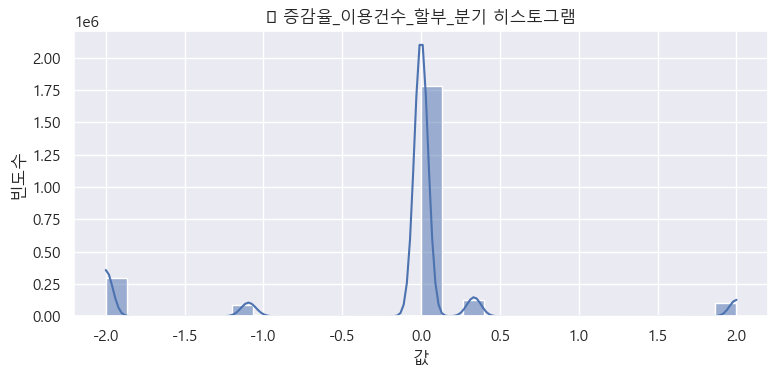

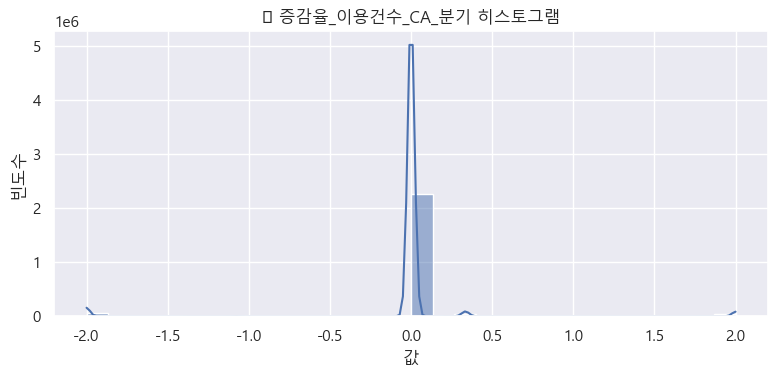

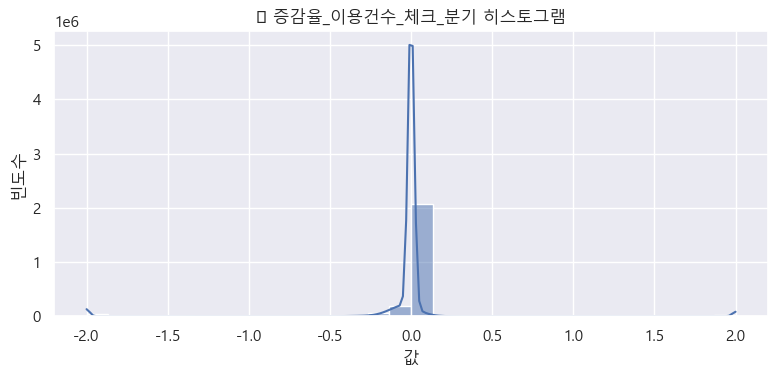

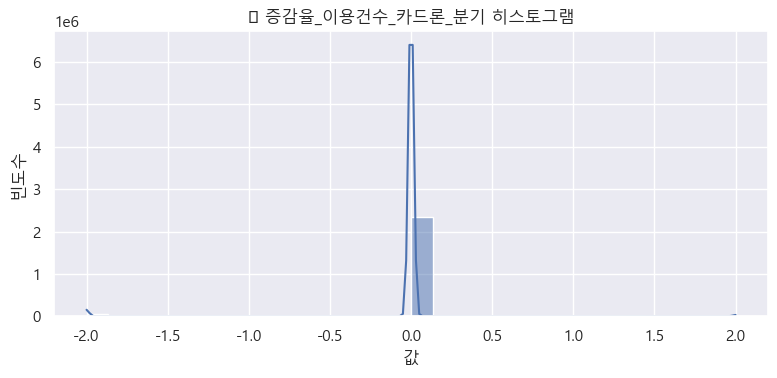

In [13]:
plot_usage_growth_histograms(result_df_with_segment)

In [14]:
def segmentwise_usage_growth_mean(df):
    usage_cols = [col for col in df.columns if col.startswith("증감율_이용건수")]

    # Segment별 평균 계산
    segment_means = df.groupby('Segment')[usage_cols].mean().round(2)
    return segment_means

In [15]:
# 세그먼트별 평균표 출력
segment_mean_df = segmentwise_usage_growth_mean(result_df_with_segment)
display(segment_mean_df)

,증감율_이용건수_신용_전월,증감율_이용건수_신판_전월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용건수_신용_분기,증감율_이용건수_신판_분기,증감율_이용건수_일시불_분기,증감율_이용건수_할부_분기,증감율_이용건수_CA_분기,증감율_이용건수_체크_분기,증감율_이용건수_카드론_분기
Segment,,,,,,,,,,,,,,
A,-0.02,-0.02,-0.01,-0.36,-0.05,-0.01,-0.01,-0.05,-0.06,-0.05,-0.23,0.03,-0.03,-0.05
B,-0.03,-0.03,-0.01,-0.48,0.00,-0.05,0.00,-0.07,-0.06,-0.06,-0.04,0.02,0.12,0.00
C,-0.02,-0.02,-0.01,-0.19,-0.05,-0.03,-0.00,-0.06,-0.06,-0.06,-0.23,-0.03,-0.03,-0.05
D,-0.02,-0.02,-0.02,-0.17,-0.03,-0.03,-0.00,-0.08,-0.08,-0.07,-0.26,-0.04,-0.03,-0.04
E,-0.03,-0.02,-0.02,-0.07,-0.01,-0.02,-0.00,-0.07,-0.07,-0.06,-0.17,-0.02,-0.02,-0.03


- 다른 컬럼들은 세그먼트 간의 큰 차이가 없는 모습을 보이고 있으며, 증감율_이용건수_할부_전월은 B에서 뚜렷하게 사용도가 높은 것을 확인해 볼 수 있다.
- 또한 반면에 E 고객의 경우 할부 이용건수가 가장 낮은 수치를 보이고 있다. 그 외의 컬럼은 유사한 형태로 보이고 있어서, 히트맵으로 직접 상관을 확인했다.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_segment_correlation_with_growth(df):
    # 1. 사용할 컬럼 선택
    usage_cols = [col for col in df.columns if col.startswith("증감율_이용건수")]

    # 2. Segment 더미 인코딩
    df_encoded = df.copy()
    segment_dummies = pd.get_dummies(df_encoded['Segment'], prefix='Segment')
    df_encoded = pd.concat([df_encoded, segment_dummies], axis=1)

    # 3. 상관계수 계산
    corr_cols = usage_cols + list(segment_dummies.columns)
    corr = df_encoded[corr_cols].corr()

    # 4. Segment 더미 변수들과의 상관만 추출
    segment_corr = corr.loc[usage_cols, segment_dummies.columns]

    # 5. 히트맵 시각화
    plt.figure(figsize=(12, 6))
    sns.heatmap(segment_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmax=1, vmin=-1)
    plt.title("📈 증감율 이용건수 ↔ 세그먼트(더미) 상관계수 히트맵")
    plt.tight_layout()
    plt.show()

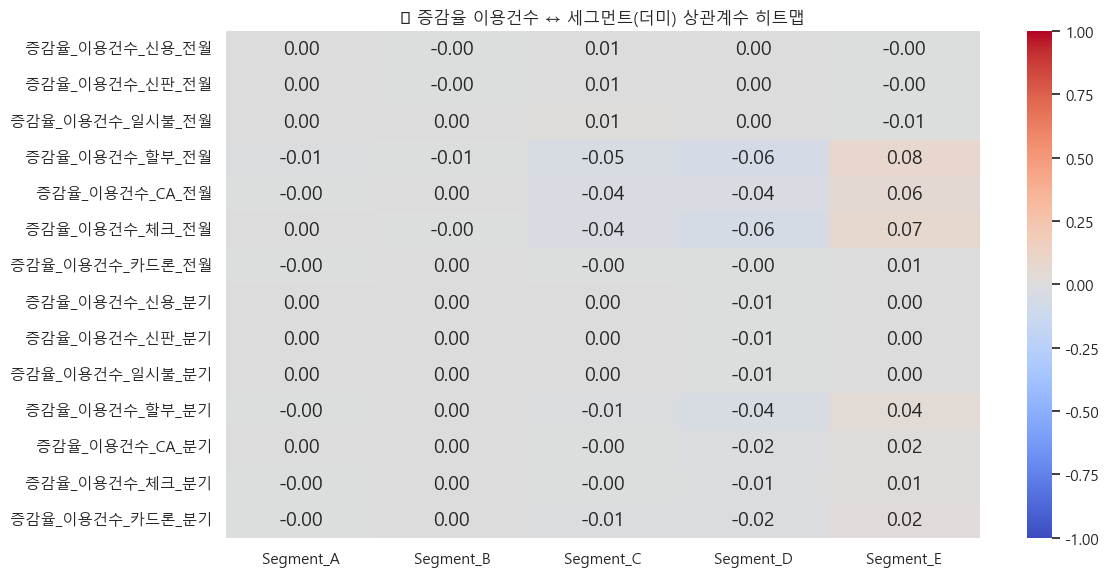

In [18]:
plot_segment_correlation_with_growth(result_df_with_segment)

## 🔍 증감율_이용건수 컬럼 정리 (세그먼트 분류 기여도 기준)

| 컬럼명                          | 판단       | 근거 요약                                                                 |
|-----------------------------------|------------|--------------------------------------------------------------------------|
| 증감율_이용건수_할부_전월         | ✅ 보존     | B세그먼트에서 평균적으로 현저히 낮고, 히트맵 상 상관도 비교적 높음        |
| 증감율_이용건수_CA_전월          | ✅ 보존     | 세그먼트 D, E와 약간의 상관이 보이며, 분포도 다소 다양함                 |
| 증감율_이용건수_체크_전월         | ✅ 보존     | Segment E와의 상관관계가 소폭 존재하며, 의미 있는 편차 가능성           |
| 증감율_이용건수_카드론_전월       | ❌ 제거     | 전체적으로 평균 편차 적으나, 특정 Segment에 유의미할 수 있어 추후 확인 필요 |
| 증감율_이용건수_신용_전월         | ❌ 제거     | 모든 세그먼트 간 평균 유사, 분포 및 상관관계 모두 미미                   |
| 증감율_이용건수_신판_전월         | ❌ 제거     | 유사하게 기여도 낮고, 중복 정보 가능성 있음                              |
| 증감율_이용건수_일시불_전월       | ❌ 제거     | 분포 좁고, 상관도 낮으며 평균 차이도 거의 없음                          |
| 증감율_이용건수_할부_분기         | 🟡 보류     | B 세그먼트에서 전월과 반대 방향으로 나와 혼란을 줄 수 있음               |
| 증감율_이용건수_CA_분기          | ❌ 제거     | 전월 데이터와 유사한 정보. 중복 가능성 높음                             |
| 증감율_이용건수_체크_분기         | ❌ 제거     | 분산과 편차 작고 히트맵 상 기여도 낮음                                  |
| 증감율_이용건수_카드론_분기       | ❌ 제거     | 전체적으로 정보 기여 낮음                                               |
| 증감율_이용건수_신용_분기         | 🟡 보류     | 평균에는 뚜렷한 분포 차이를 보이지 않으나, 분산이 높아, 보류               |
| 증감율_이용건수_신판_분기         | 🟡 보류     | 평균에는 뚜렷한 분포 차이를 보이지 않으나, 분산이 높아, 보류               |
| 증감율_이용건수_일시불_분기       | 🟡 보류     | 평균에는 뚜렷한 분포 차이를 보이지 않으나, 분산이 높아, 보류        |


### 대부분 0에 가까운 값들이 많아서 분산을 확인

In [21]:
# 확인할 컬럼 리스트
cols = [
    "증감율_이용건수_신용_전월", "증감율_이용건수_신판_전월", "증감율_이용건수_일시불_전월",
    "증감율_이용건수_CA_전월", "증감율_이용건수_체크_전월", "증감율_이용건수_카드론_전월",
    "증감율_이용건수_신용_분기", "증감율_이용건수_신판_분기", "증감율_이용건수_일시불_분기",
    "증감율_이용건수_CA_분기", "증감율_이용건수_체크_분기", "증감율_이용건수_카드론_분기"
]

# 분산 계산
variance_df = result_df_with_segment[cols].var().sort_values(ascending=False)

# 결과 출력
print("📊 증감율 이용건수 관련 컬럼 분산:")
print(variance_df)

📊 증감율 이용건수 관련 컬럼 분산:
증감율_이용건수_신용_분기     0.361701
증감율_이용건수_신판_분기     0.357320
증감율_이용건수_일시불_분기    0.342039
증감율_이용건수_CA_분기     0.165351
증감율_이용건수_체크_분기     0.128541
증감율_이용건수_신용_전월     0.102817
증감율_이용건수_신판_전월     0.101238
증감율_이용건수_일시불_전월    0.094753
증감율_이용건수_카드론_분기    0.091051
증감율_이용건수_CA_전월     0.034827
증감율_이용건수_체크_전월     0.006608
증감율_이용건수_카드론_전월    0.004596
dtype: float64


### 높은 분산을 보이는 컬럼
- 증감율_이용건수_신용_분기
- 증감율_이용건수_신판_분기
- 증감율_이용건수_일시불_분기	0.3420	↑ 동일

### 중간 정도의 분산을 보이는 컬럼
- 증감율_이용건수_CA_분기
- 증감율_이용건수_체크_분기

## 증감율 관련 컬럼
- 이용금액

In [24]:
# '증감율_이용건수'로 시작하는 컬럼만 추출
usage_money_cols = [col for col in result_df_with_segment.columns if col.startswith("증감율_이용금액")]

# 결과 확인
print("📌 결제 및 연체 관련 컬럼:")
for col in usage_money_cols:
    print(col)

📌 결제 및 연체 관련 컬럼:
증감율_이용금액_신용_전월
증감율_이용금액_신판_전월
증감율_이용금액_일시불_전월
증감율_이용금액_할부_전월
증감율_이용금액_CA_전월
증감율_이용금액_체크_전월
증감율_이용금액_카드론_전월
증감율_이용금액_신용_분기
증감율_이용금액_신판_분기
증감율_이용금액_일시불_분기
증감율_이용금액_할부_분기
증감율_이용금액_CA_분기
증감율_이용금액_체크_분기
증감율_이용금액_카드론_분기


In [25]:
def show_value_counts_for_usage_money(df):
    # '증감율_이용건수'로 시작하는 컬럼만 선택
    usage_cols = [col for col in df.columns if col.startswith("증감율_이용금액")]

    # 각 컬럼에 대해 도수분포 출력
    for col in usage_cols:
        print(f"\n📊 [ {col} ] 도수분포:")
        print(df[col].value_counts(dropna=False).sort_index())

In [26]:
show_value_counts_for_usage_money(result_df_with_segment)


📊 [ 증감율_이용금액_신용_전월 ] 도수분포:
증감율_이용금액_신용_전월
-2.004689    1
-2.004130    1
-2.003990    1
-2.003956    1
-2.003890    1
            ..
 2.003382    1
 2.003545    1
 2.003588    1
 2.003714    1
 2.004175    1
Name: count, Length: 1636476, dtype: int64

📊 [ 증감율_이용금액_신판_전월 ] 도수분포:
증감율_이용금액_신판_전월
-2.004130    1
-2.003956    1
-2.003890    1
-2.003876    1
-2.003836    1
            ..
 2.003382    1
 2.003545    1
 2.003588    1
 2.003714    1
 2.004175    1
Name: count, Length: 1631618, dtype: int64

📊 [ 증감율_이용금액_일시불_전월 ] 도수분포:
증감율_이용금액_일시불_전월
-2.003836    1
-2.003676    1
-2.003674    1
-2.003662    1
-2.003603    1
            ..
 2.002927    1
 2.003011    1
 2.003035    1
 2.003250    1
 2.003318    1
Name: count, Length: 1621699, dtype: int64

📊 [ 증감율_이용금액_할부_전월 ] 도수분포:
증감율_이용금액_할부_전월
-1.999996    81667
-0.791064        1
-0.760089        1
-0.757875        1
-0.737158        1
             ...  
 0.610130        1
 0.615835        1
 0.630514        1
 0.687264        1
 1.999996   

In [27]:
def segmentwise_usage_money_mean(df):
    usage_cols = [col for col in df.columns if col.startswith("증감율_이용금액")]

    # Segment별 평균 계산
    segment_means = df.groupby('Segment')[usage_cols].mean().round(2)
    return segment_means

In [28]:
# 세그먼트별 평균표 출력
segment_mean_df = segmentwise_usage_money_mean(result_df_with_segment)
display(segment_mean_df)

,증감율_이용금액_신용_전월,증감율_이용금액_신판_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,증감율_이용금액_체크_전월,증감율_이용금액_카드론_전월,증감율_이용금액_신용_분기,증감율_이용금액_신판_분기,증감율_이용금액_일시불_분기,증감율_이용금액_할부_분기,증감율_이용금액_CA_분기,증감율_이용금액_체크_분기,증감율_이용금액_카드론_분기
Segment,,,,,,,,,,,,,,
A,0.07,0.17,0.17,-0.09,-0.02,-0.01,-0.01,-0.24,-0.25,-0.18,-0.20,-0.03,-0.03,-0.05
B,0.08,0.24,0.25,-0.10,-0.00,-0.04,0.00,-0.28,-0.24,-0.16,-0.12,-0.02,0.11,0.00
C,0.12,0.17,0.17,-0.06,-0.01,-0.02,-0.00,-0.14,-0.14,-0.10,-0.17,-0.05,-0.03,-0.05
D,0.13,0.16,0.16,-0.07,-0.01,-0.01,-0.00,-0.16,-0.15,-0.12,-0.19,-0.04,-0.03,-0.05
E,0.06,0.07,0.07,-0.04,-0.01,-0.01,-0.00,-0.13,-0.13,-0.10,-0.13,-0.01,-0.02,-0.03


In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_segment_correlation_with_money(df):
    # 1. 사용할 컬럼 선택 (증감율_이용금액으로 시작하는 컬럼)
    usage_cols = [col for col in df.columns if col.startswith("증감율_이용금액")]

    # 2. Segment 더미 인코딩
    df_encoded = df.copy()
    segment_dummies = pd.get_dummies(df_encoded['Segment'], prefix='Segment')
    df_encoded = pd.concat([df_encoded, segment_dummies], axis=1)

    # 3. 상관계수 계산
    corr_cols = usage_cols + list(segment_dummies.columns)
    corr = df_encoded[corr_cols].corr()

    # 4. Segment 더미 변수들과의 상관만 추출
    segment_corr = corr.loc[usage_cols, segment_dummies.columns]

    # 5. 히트맵 시각화
    plt.figure(figsize=(12, 6))
    sns.heatmap(segment_corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmax=1, vmin=-1)
    plt.title("📈 증감율 이용금액 ↔ 세그먼트(더미) 상관계수 히트맵")
    plt.tight_layout()
    plt.show()

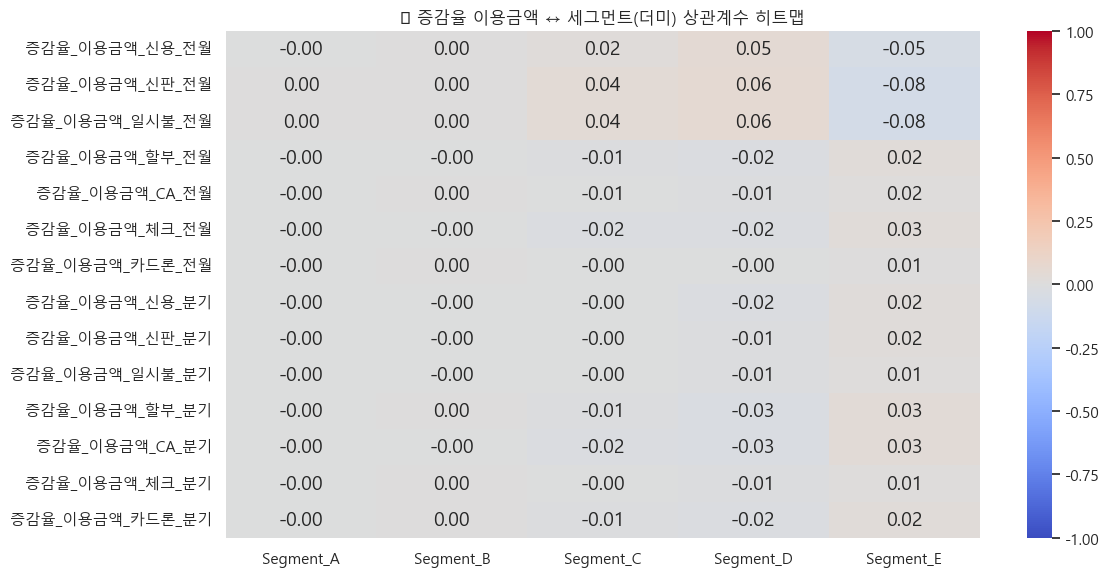

In [30]:
plot_segment_correlation_with_money(result_df_with_segment)

## 📊 세그먼트별 증감율 이용금액 평균 해석

### ✅ 전월 기준

| 컬럼명               | A     | B     | C     | D     | E     | 주요 해석                     |
|----------------------|-------|-------|-------|-------|-------|------------------------------|
| **신용**             | 0.07  | 0.08  | 0.12  | 0.13  | 0.06  | D > C > B > A > E             |
| **신판**             | 0.17  | 0.24  | 0.17  | 0.16  | 0.07  | **B만 뚜렷하게 높음**         |
| **일시불**           | 0.17  | 0.25  | 0.17  | 0.16  | 0.07  | **B에서 유독 증가**           |
| **할부**             | -0.09 | -0.10 | -0.06 | -0.07 | -0.04 | 모두 감소, E가 가장 작게 감소 |
| **CA**               | -0.02 | -0.00 | -0.01 | -0.01 | -0.01 | 큰 차이 없음                  |
| **체크**             | -0.01 | -0.04 | -0.02 | -0.01 | -0.01 | B에서만 눈에 띄는 감소        |
| **카드론**           | -0.01 | 0.00  | -0.00 | -0.00 | -0.00 | 유의미한 차이 없음            |

### ✅ 분기 기준

| 컬럼명               | A     | B     | C     | D     | E     | 주요 해석                         |
|----------------------|-------|-------|-------|-------|-------|----------------------------------|
| **신용**             | -0.24 | -0.28 | -0.14 | -0.16 | -0.13 | A, B에서 감소폭 큼                |
| **신판**             | -0.25 | -0.24 | -0.14 | -0.15 | -0.13 | A, B만 뚜렷한 감소                |
| **일시불**           | -0.18 | -0.16 | -0.10 | -0.12 | -0.10 | A, B 감소폭 상대적으로 큼        |
| **할부**             | -0.20 | -0.12 | -0.17 | -0.19 | -0.13 | **B만 완화된 감소폭**            |
| **CA**               | -0.03 | -0.02 | -0.05 | -0.04 | -0.01 | **E가 가장 적은 감소**           |
| **체크**             | -0.03 | 0.11  | -0.03 | -0.03 | -0.02 | **B에서 유일하게 증가**         |
| **카드론**           | -0.05 | 0.00  | -0.05 | -0.05 | -0.03 | 큰 차이 없음, E가 상대적으로 적음 |

---

## 🔍 요약 인사이트

- **B 세그먼트**는 신판·일시불에서 **전월 기준 증가율이 매우 높고**, **체크카드 이용도 분기 기준으로 증가** → **적극적인 결제 패턴의 고객**일 수 있음.
- **A 세그먼트**는 분기 기준으로 대부분의 항목에서 **가장 큰 감소 폭** → **이탈 가능성 높은 고객군**일 가능성 있음.
- **E 세그먼트**는 전반적으로 증감율이 작거나 감소폭이 작아 **안정적인 소비패턴**을 보일 수 있음.
- **카드론, CA, 체크카드 등 일부 항목은 전체적으로 변화폭이 작아 인사이트가 뚜렷하지 않음.**


## 🎯 변수 선택 기준 정리 (세그먼트 분석 기반)

| 구분 | 설명 | 예시 변수 | 유지 여부 | 비고 |
|------|------|-----------|------------|------|
| **세그먼트별 평균 차이 뚜렷** | 세그먼트 간 증감율 평균값 차이가 크고, 해석 가능한 소비 패턴이 보이는 변수 | `증감율_이용금액_신판_전월`, `증감율_이용금액_일시불_전월` | ✅ 유지 | B세그먼트의 소비 급증 등 |
| **히트맵에서 낮은 상관 but 평균 해석 가능** | 상관계수는 낮지만, 평균값 비교 시 유의미한 흐름이 관찰되는 변수 | `증감율_이용금액_신용_전월`, `증감율_이용금액_신용_분기` | ✅ 유지 (후보군) | 평균 기반 해석 위주 활용 |
| **세그먼트별 차이 미미 & 분산도 매우 낮음** | 평균도 거의 유사하고, 분산도 낮아 설명력이 약한 변수 | `증감율_이용금액_카드론_전월`, `증감율_이용금액_체크_전월` | ❌ 제거 고려 | 거의 대부분 0 근처 분포 |
| **전월과 분기 모두 해석이 어려움** | 세그먼트 간 차이도 없고, 전체적으로 유의미한 정보가 없는 변수 | `증감율_이용금액_CA_전월`, `증감율_이용금액_CA_분기` | ❌ 제거 후보 | 히트맵·평균 모두 미미 |


In [33]:
# 확인할 컬럼 리스트
cols = [
    "증감율_이용금액_CA_전월", "증감율_이용금액_체크_전월", "증감율_이용금액_카드론_전월",
    "증감율_이용금액_CA_분기", "증감율_이용금액_체크_분기", "증감율_이용금액_카드론_분기"
]


# 분산 계산
variance_df = result_df_with_segment[cols].var().sort_values(ascending=False)

# 결과 출력
print("📊 증감율 이용건수 관련 컬럼 분산:")
print(variance_df)

📊 증감율 이용건수 관련 컬럼 분산:
증감율_이용금액_CA_분기     0.130171
증감율_이용금액_체크_분기     0.122795
증감율_이용금액_카드론_분기    0.093234
증감율_이용금액_CA_전월     0.019672
증감율_이용금액_체크_전월     0.016107
증감율_이용금액_카드론_전월    0.004819
dtype: float64


## 📌 증감율_이용금액 관련 변수 정리표 (세그먼트 분류 기여도 기반)

| 변수명 | 세그먼트별 평균 차이 | 히트맵 상관계수 | 분산 | 해석 가능성 | 선택 여부 |
|--------|----------------------|------------------|-------|---------------|------------|
| 증감율_이용금액_신용_전월 | 보통 | 약함 (+0.05) | 보통 | B > D > C 경향 | ✅ 유지 |
| 증감율_이용금액_신판_전월 | 큼 | 약간 (+0.06) | 큼 | B세그먼트에서 소비 급증 | ✅ 유지 |
| 증감율_이용금액_일시불_전월 | 큼 | 약간 (+0.06) | 큼 | B세그먼트에서 두드러짐 | ✅ 유지 |
| 증감율_이용금액_할부_전월 | 작음 | 미미 (±0.02) | 작음 | 약간의 패턴 존재 | ⚠️ 보류 |
| 증감율_이용금액_CA_전월 | 없음 | 없음 | 매우 작음 | 해석 어려움 | ❌ 제거 후보 |
| 증감율_이용금액_체크_전월 | 없음 | 없음 | 매우 작음 | 해석 어려움 | ❌ 제거 후보 |
| 증감율_이용금액_카드론_전월 | 없음 | 없음 | 매우 작음 | 거의 0 근처 | ❌ 제거 후보 |
| 증감율_이용금액_신용_분기 | 보통 | 없음 | 보통 | 약한 패턴 | ⚠️ 보류 |
| 증감율_이용금액_신판_분기 | 작음 | 없음 | 보통 | 흐름 약함 | ❌ 제거 후보 |
| 증감율_이용금액_일시불_분기 | 작음 | 없음 | 보통 | 흐름 약함 | ❌ 제거 후보 |
| 증감율_이용금액_할부_분기 | 없음 | 없음 | 작음 | 정보 거의 없음 | ❌ 제거 후보 |
| 증감율_이용금액_CA_분기 | 없음 | 없음 | 매우 작음 | 거의 0 | ❌ 제거 후보 |
| 증감율_이용금액_체크_분기 | 없음 | 없음 | 매우 작음 | 거의 0 | ❌ 제거 후보 |
| 증감율_이용금액_카드론_분기 | 없음 | 없음 | 매우 작음 | 거의 0 | ❌ 제거 후보 |


In [35]:
# 증감율_이용금액_카드론_전월
# 대부분 0에 속하는데, 0이 아닌 경우의 실제 데이터 분포 중에서 각 세그먼트 비율이 어느정도 차지하는지
def non_zero_segment_ratio(df, col, segment_col='Segment'):
    # 1. 0이 아닌 값만 필터링
    non_zero_df = df[df[col] != 0]

    # 2. 세그먼트별 개수 세기
    segment_counts = non_zero_df[segment_col].value_counts()

    # 3. 전체 비율 계산
    segment_ratio = (segment_counts / segment_counts.sum()).sort_index()

    # 결과 출력
    result = pd.DataFrame({
        'Count': segment_counts,
        'Ratio': segment_ratio
    })
    return result

In [38]:
non_zero_segment_ratio(result_df_with_segment, "증감율_이용금액_카드론_전월")

,Count,Ratio
Segment,,
A,5,0.001727
C,217,0.074957
D,560,0.193437
E,2113,0.729879


In [40]:
# 증감율_이용건수_체크_분기
non_zero_segment_ratio(result_df_with_segment, "증감율_이용건수_체크_분기")

,Count,Ratio
Segment,,
A,117,0.000277
B,51,0.000121
C,38372,0.090921
D,101662,0.240884
E,281836,0.667798
